In [50]:
import mne
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from sklearn.preprocessing import MinMaxScaler

In [51]:
df=pd.read_csv('./Users/kuldip/Downloads/data/MU.txt',delimiter='\t',header=None)
df.columns =['id','event','device','channel','code','size','data']
df

,id,event,device,channel,code,size,data
0,978111,132669,MU,TP9,6,459,"475,474,477,486,486,476,479,483,489,483,482,48..."
1,978112,132669,MU,FP1,6,459,"468,487,493,493,498,493,491,490,492,487,483,48..."
2,978113,132669,MU,FP2,6,459,"482,475,490,500,485,470,470,482,490,484,478,48..."
3,978114,132669,MU,TP10,6,459,"470,470,478,489,487,475,469,478,488,483,474,48..."
4,978115,132670,MU,TP9,7,493,"506,499,495,491,492,507,496,500,498,496,499,50..."
...,...,...,...,...,...,...,...
163927,1142038,173650,MU,TP10,-1,460,"537,531,530,531,533,537,537,555,534,522,531,54..."
163928,1142039,173651,MU,TP9,-1,460,"521,517,526,524,514,519,520,526,526,514,519,52..."
163929,1142040,173651,MU,FP1,-1,460,"525,518,522,525,523,523,512,523,519,522,523,52..."
163930,1142041,173651,MU,FP2,-1,460,"502,493,500,511,510,512,523,507,497,503,502,50..."


In [52]:
df['data'] = df['data'].apply(lambda x : np.array(x.split(',')))
grouped = df.groupby('channel')
tp9 = grouped.get_group('TP9')
tp9

,id,event,device,channel,code,size,data
0,978111,132669,MU,TP9,6,459,"[475, 474, 477, 486, 486, 476, 479, 483, 489, ..."
4,978115,132670,MU,TP9,7,493,"[506, 499, 495, 491, 492, 507, 496, 500, 498, ..."
8,978119,132671,MU,TP9,6,459,"[520, 533, 528, 517, 522, 534, 534, 531, 522, ..."
12,978123,132672,MU,TP9,6,459,"[512, 530, 527, 531, 520, 515, 525, 528, 522, ..."
16,978127,132673,MU,TP9,1,493,"[502, 503, 498, 500, 493, 507, 514, 506, 501, ..."
...,...,...,...,...,...,...,...
163912,1142023,173647,MU,TP9,-1,460,"[574, 568, 555, 569, 562, 561, 561, 560, 569, ..."
163916,1142027,173648,MU,TP9,-1,460,"[571, 578, 579, 568, 566, 579, 580, 562, 578, ..."
163920,1142031,173649,MU,TP9,-1,460,"[536, 530, 543, 545, 541, 538, 532, 532, 523, ..."
163924,1142035,173650,MU,TP9,-1,460,"[558, 558, 559, 559, 554, 558, 555, 537, 549, ..."


In [53]:
median_tp9 = tp9['size'].median()
print(median_tp9)

460.0


In [54]:
scaler = MinMaxScaler()
tp9.loc[:, 'data_scaled'] = tp9['data'].apply(
    lambda x: MinMaxScaler().fit_transform(x.reshape(-1, 1)).flatten()
)

/var/folders/y0/2rd1h43n3v1dmrspx72t7dhc0000gn/T/ipykernel_39402/1740576942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp9.loc[:, 'data_scaled'] = tp9['data'].apply(


In [55]:
def interpolate_row(data, new_size):
    old_size = len(data)
    if old_size==new_size:
        return data
    x_old = np.linspace(0,1,old_size)
    x_new = np.linspace(0,1,new_size)
    interpolate = interp1d(x_old,data, kind='linear')
    return interpolate(x_new)

In [56]:
tp9.head()

,id,event,device,channel,code,size,data,data_scaled
0,978111,132669,MU,TP9,6,459,"[475, 474, 477, 486, 486, 476, 479, 483, 489, ...","[0.1898734177215191, 0.17721518987341778, 0.21..."
4,978115,132670,MU,TP9,7,493,"[506, 499, 495, 491, 492, 507, 496, 500, 498, ...","[0.3793103448275854, 0.2586206896551726, 0.189..."
8,978119,132671,MU,TP9,6,459,"[520, 533, 528, 517, 522, 534, 534, 531, 522, ...","[0.6756756756756754, 0.8513513513513518, 0.783..."
12,978123,132672,MU,TP9,6,459,"[512, 530, 527, 531, 520, 515, 525, 528, 522, ...","[0.43939393939393945, 0.7121212121212128, 0.66..."
16,978127,132673,MU,TP9,1,493,"[502, 503, 498, 500, 493, 507, 514, 506, 501, ...","[0.32608695652173836, 0.3478260869565215, 0.23..."


In [57]:
tp9.loc[:, 'new_data'] = tp9['data_scaled'].apply(lambda x: interpolate_row(x, int(median_tp9)))
tp9.head()

/var/folders/y0/2rd1h43n3v1dmrspx72t7dhc0000gn/T/ipykernel_39402/3675173350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp9.loc[:, 'new_data'] = tp9['data_scaled'].apply(lambda x: interpolate_row(x, int(median_tp9)))


,id,event,device,channel,code,size,data,data_scaled,new_data
0,978111,132669,MU,TP9,6,459,"[475, 474, 477, 486, 486, 476, 479, 483, 489, ...","[0.1898734177215191, 0.17721518987341778, 0.21...","[0.1898734177215191, 0.1772427677118668, 0.215..."
4,978115,132670,MU,TP9,7,493,"[506, 499, 495, 491, 492, 507, 496, 500, 498, ...","[0.3793103448275854, 0.2586206896551726, 0.189...","[0.3793103448275854, 0.2536623844940277, 0.179..."
8,978119,132671,MU,TP9,6,459,"[520, 533, 528, 517, 522, 534, 534, 531, 522, ...","[0.6756756756756754, 0.8513513513513518, 0.783...","[0.6756756756756754, 0.8509686156744984, 0.784..."
12,978123,132672,MU,TP9,6,459,"[512, 530, 527, 531, 520, 515, 525, 528, 522, ...","[0.43939393939393945, 0.7121212121212128, 0.66...","[0.43939393939393945, 0.7115270350564475, 0.66..."
16,978127,132673,MU,TP9,1,493,"[502, 503, 498, 500, 493, 507, 514, 506, 501, ...","[0.32608695652173836, 0.3478260869565215, 0.23...","[0.32608695652173836, 0.34001136686558653, 0.2..."


In [58]:

processed_groups = []

# Loop over all channel names
for channel_name, group_df in grouped:
    # Make a copy of the group's DataFrame
    df = group_df.copy()
    median_size = int(df['size'].median())
    df['data_scaled'] = df['data'].apply(
        lambda x: MinMaxScaler().fit_transform(x.reshape(-1, 1)).flatten()
    )
    df['new_data'] = df['data_scaled'].apply(
        lambda x: interpolate_row(x, median_size)
    )
    
    processed_groups.append(df)

final_df = pd.concat(processed_groups, ignore_index=True)


In [59]:
final_df[['channel', 'size', 'data_scaled', 'new_data']]

,channel,size,data_scaled,new_data
0,FP1,459,"[0.0, 0.296875, 0.390625, 0.390625, 0.46875, 0...","[0.0, 0.2962282135076253, 0.39021650326797386,..."
1,FP1,493,"[0.47499999999999964, 0.7249999999999996, 0.67...","[0.47499999999999964, 0.7214052287581697, 0.64..."
2,FP1,459,"[0.2857142857142865, 0.6190476190476186, 0.571...","[0.2857142857142865, 0.6183214026351278, 0.571..."
3,FP1,459,"[0.2857142857142865, 0.6904761904761916, 0.642...","[0.2857142857142865, 0.689594356261024, 0.6430..."
4,FP1,493,"[0.32786885245901587, 0.4098360655737707, 0.44...","[0.32786885245901587, 0.4121932926175937, 0.45..."
...,...,...,...,...
163927,TP9,460,"[0.8723404255319149, 0.8085106382978724, 0.670...","[0.8723404255319149, 0.8085106382978724, 0.670..."
163928,TP9,460,"[0.7028985507246377, 0.7536231884057969, 0.760...","[0.7028985507246377, 0.7536231884057969, 0.760..."
163929,TP9,460,"[0.6851851851851851, 0.6296296296296298, 0.75,...","[0.6851851851851851, 0.6296296296296298, 0.75,..."
163930,TP9,460,"[0.6470588235294112, 0.6470588235294112, 0.654...","[0.6470588235294112, 0.6470588235294112, 0.654..."


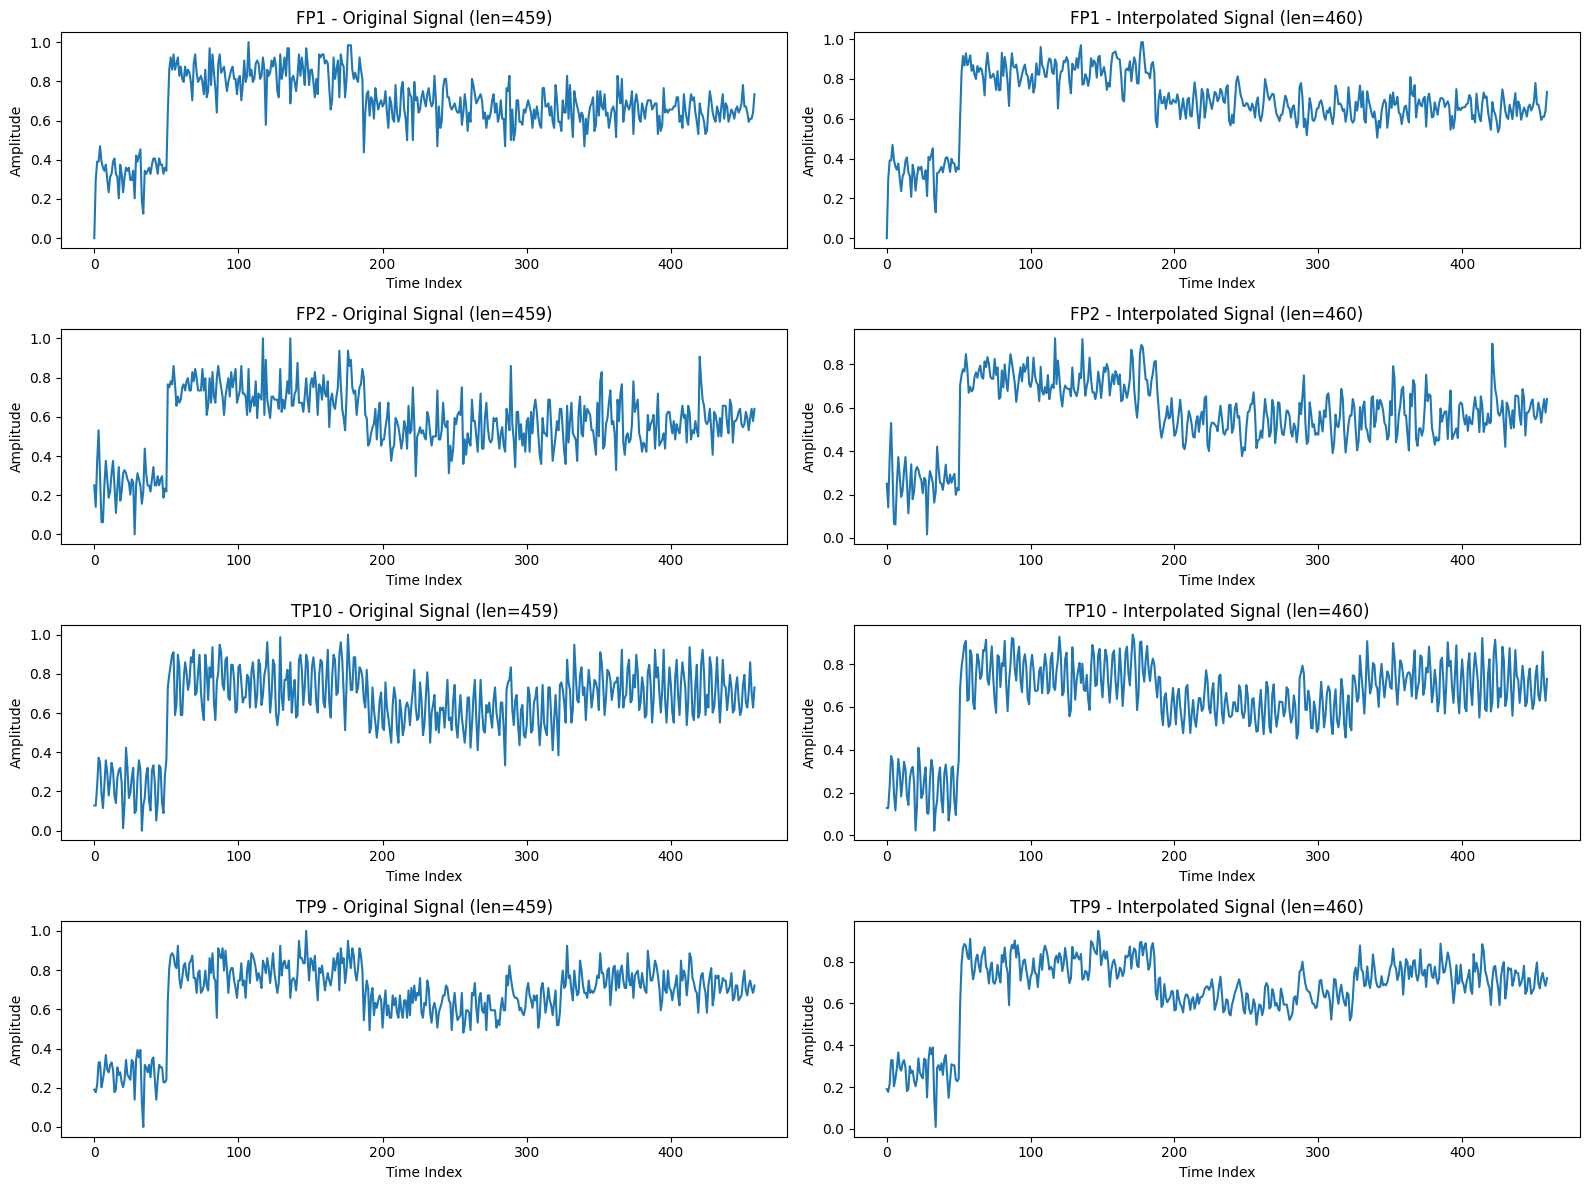

In [60]:
import matplotlib.pyplot as plt

channels = final_df['channel'].unique()

plt.figure(figsize=(16, len(channels) * 3))

for i, ch in enumerate(channels):
    df_ch = final_df[final_df['channel'] == ch].iloc[0]
    # Original and interpolated signals
    original = df_ch['data_scaled']
    interpolated = df_ch['new_data']
    
    plt.subplot(len(channels), 2, 2 * i + 1)
    plt.plot(original)
    plt.title(f'{ch} - Original Signal (len={len(original)})')
    plt.xlabel('Time Index')
    plt.ylabel('Amplitude')
    
    plt.subplot(len(channels), 2, 2 * i + 2)
    plt.plot(interpolated)
    plt.title(f'{ch} - Interpolated Signal (len={len(interpolated)})')
    plt.xlabel('Time Index')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
